# N Queen Attack Detection

In [1]:
import matplotlib.pyplot as plt

def drawBoard(P):
  n = len(P)
  # Create a figure and axes
  fig, ax = plt.subplots()

  # Set axis limits and aspect ratio
  ax.set_xlim(0, n)
  ax.set_ylim(0, n)
  ax.set_aspect('equal')

  # Turn off axis ticks and labels
  ax.set_xticks([])
  ax.set_yticks([])

  # Draw the board grid
  for i in range(n + 1):
      ax.plot([0, n], [i, i], 'k-', linewidth=2) # Horizontal lines
      ax.plot([i, i], [0, n], 'k-', linewidth=2) # Vertical lines

  # Place queens
  for i in range(n):
    row, col = P[i]
    # Adjust for visual centering
    ax.text(col - 0.5 , n - row + 0.5, 'Q'+str(i + 1), ha='center', va='center', fontsize=12, color='red', weight='bold')

  # Show the plot
  plt.show()

[12, 4, 1, 6]
[(4, 1), (2, 1), (1, 2), (2, 3)]


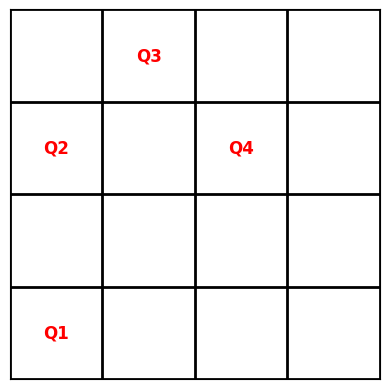

In [2]:
import random
def generate_positions(n):
    numbers = random.sample(range(n**2), n)
    print(numbers)
    P = []
    for num in numbers:
        row = num // n + 1
        col = num % n + 1
        P.append((row,col))
    return P

pos = generate_positions(4)
print(pos)
drawBoard(pos)

In [3]:
# row attack
def rowAttacK(P):
  n = len(P)
  count = 0
  for i in range(n):
    for j in range(i+1,n):
      if P[i][0] == P[j][0]:
        print('row attack:', end = " " )
        print(i+1,P[i], end = ", ")
        print(j+1,P[j])
        count = count + 1
  return count

rowAttacK(pos)

row attack: 2 (2, 1), 4 (2, 3)


1

In [4]:
abs(-2)

2

In [5]:
#column attack
def columnAttack(P):
    n = len(P)
    count = 0
    for i in range(n):
        for j in range(i + 1, n):
            # Check if queens share the same column
            if P[i][1] == P[j][1]:
                print(f'Column attack: Queen {i + 1} at {P[i]} and Queen {j + 1} at {P[j]}')
                count += 1
    return count

    columnAttack(pos)

In [6]:
# diagonal atack
def diagonalAttack(P):
    n = len(P)
    count = 0
    for i in range(n):
        for j in range(i + 1, n):
            # Check if queens share a diagonal
            if abs(P[i][0] - P[j][0]) == abs(P[i][1] - P[j][1]):
                print(f'Diagonal attack: Queen {i + 1} at {P[i]} and Queen {j + 1} at {P[j]}')
                count += 1
    return count

# Example usage
diagonalAttack(pos)

Diagonal attack: Queen 1 at (4, 1) and Queen 4 at (2, 3)
Diagonal attack: Queen 2 at (2, 1) and Queen 3 at (1, 2)
Diagonal attack: Queen 3 at (1, 2) and Queen 4 at (2, 3)


3

In [7]:
# implement a method to print a state is valid or not
def isValid(P):
    n = len(P)

    # Check for row, column, and diagonal attacks
    for i in range(n):
        for j in range(i + 1, n):
            # Check for row attack
            if P[i][0] == P[j][0]:
                return False

            # Check for column attack
            if P[i][1] == P[j][1]:
                return False

            # Check for diagonal attack
            if abs(P[i][0] - P[j][0]) == abs(P[i][1] - P[j][1]):
                return False

    return True

# Example usage
pos = [(1, 3), (3, 3), (1, 1), (4, 2)]  # A list of queen positions
print(isValid(pos))  # Output: False (because of row and column conflicts)


False


In [8]:
# call isValid untill you get valid solution
import random

def generateRandomPositions(n):
    # Generate random positions for n queens where each queen is in a different row
    positions = []
    for row in range(1, n + 1):
        col = random.randint(1, n)  # Randomly place in a column from 1 to n
        positions.append((row, col))
    return positions

def findValidSolution(n):
    while True:
        pos = generateRandomPositions(n)  # Generate random queen positions
        if isValid(pos):
            return pos  # Return the valid configuration

# Example usage: Try to find a valid solution for 4 queens
n = 4
valid_pos = findValidSolution(n)
print("Valid Solution:", valid_pos)


Valid Solution: [(1, 3), (2, 1), (3, 4), (4, 2)]
